For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?

$H_0$: Network latency is same before and after switching to ISP\
$H_a$: Network latency has gone up after switching to ISP

- True Positive:
    - low p value
    - reject $H_0$
    - Network latency before the switch 0.5 ms
    - Network latency after the switch 2 ms
 
 
- False Positive:
    - low p value
    - reject $H_0$
    - significantly higher latency time after switch
    - Testing before and after was done with different hardware and different time of day

- True Negative:
    - higher p value
    - accept $H_0$
    - Network latency before the switch 2 ms
    - Network latency after the switch 0.5 ms
     
- False Negative
    - higher p value
    - accept $H_0$
    - network latency has not changed much
    - two tests (before and after) have other variables which affect latency measurement

Is the website redesign any good?

$H_0$: The website redesign does not result in increased customer satisfaction\
$H_a$: The website redesign results in increased customer satisfaction

- True Positive:
    - low p value
    - reject  $H_0$
    - the customer satisfaction rating before website redesign 6/10
    - the customer satisfaction rating after website redsign 9/10

- False Positive: 
    - low p value
    - reject  $H_0$
    - The customer satisfaction rating increased after website redesign
    - The rating questionnaire changed before and after website redesign
    
- False Negative:
    - high p value
    - accept $H_0$
    - survey shows customer satisfaction rating has not changed
    - survey had differenr scales/questions before and after the redesign
- True Negative:
    - higher p value
    - accept $H_0$
    - survey shows customer satisfaction rating has not changed
    - the customer satisfaction rating before website redesign 7.5/10
    - the customer satisfaction rating after website redsign 7/10

Is our television ad driving more sales?

$H_0$: TV ad does not drive more sales\
$H_a$: TV ad does drive more sales

- True Positive:
    - low p value
    - reject  $H_0$
    - average monthly sales before TV ads is 1 million
    - average monthly sales after TV ads is 2.2 million

- False Positive: 
    - low p value
    - reject  $H_0$
    - sales increased after TV ads
    - New products were introduced along with TV ads
    
- False Negative:
    - high p value
    - accept $H_0$
    - sales did not change after TV ads
    - Economy is in recession resulting in lower demand
    
- True Negative:
    - higher p value
    - accept $H_0$
    - sales before TV ads is 1 million
    - sales after TV ads is 0.9 million

# t-test exercise


Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [72]:

from math import sqrt

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from pydataset import data
import datetime 
from dateutil import relativedelta

$H_0$: average time to sell homes for its two offices is same\
$H_a$ average time to sell homes for its two offices is different

In [2]:
alpha = 0.05

xbar1 = 90
xbar2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

degf = (n1 + n2) - 2 # n - number of categories

s_p = sqrt(
    ((n1 - 1) * s1**2 + (n2 - 1) * s2**2)
    /
    (n1 + n2 - 2)
)

t = (xbar1 - xbar2) / (s_p * sqrt(1 / n1 + 1 / n2))


print(f't = {t:.3}')

t = -2.63


In [3]:
p = stats.t(degf).cdf(t) * 2
print(f'p = {p:.3}')

p = 0.0102


Since p value is less than 0.05, we reject the null hypothesis meaning there is difference in average time to sell for two offices

# Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [4]:
mpg = data('mpg')


In [5]:
mpg['average_mpg'] = mpg[['cty', 'hwy']].mean(axis= 1)
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


$H_0$: Cars from both model years have same mpg\
$H_a$: Cars from both model years have different mpg

In [6]:
fe_2008 = mpg[mpg.year == 2008].average_mpg
fe_1999 = mpg[mpg.year == 1999].average_mpg

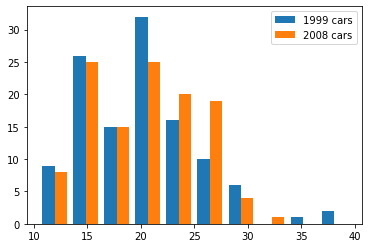

In [7]:
plt.hist([fe_1999, fe_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

In [8]:
t_stat, p = stats.ttest_ind(fe_1999, fe_2008)

print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = 0.22
p = 0.826


Since p value is >0.05, we fail to reject the null hypothesis meaning their fuel economy is no different

# Are compact cars more fuel-efficient than the average car? 

$H_0$: compact cars have same fuel efficiency as a average car\
$H_a$: compact cars are more fuel efficient than average car

In [9]:
mpg = mpg.rename(columns ={'class' : 'type'})

In [10]:
x = mpg[mpg.type == 'compact'].average_mpg
mu = mpg.average_mpg.mean()
t_stat, p = stats.ttest_1samp(x, mu)

print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = 7.9
p = 4.2e-10


Since p value is <0.05, we reject the null hypothesis meaning their fuel economy is not same

# Do manual cars get better gas mileage than automatic cars?

$H_0$: manual car get same mileage as automatic cars

In [11]:
fe_auto = mpg[mpg.trans.str.contains('auto')].average_mpg
fe_manual = mpg[mpg.trans.str.contains('manual')].average_mpg

In [12]:
t_stat, p = stats.ttest_ind(fe_auto, fe_manual)

print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = -4.59
p = 7.15e-06


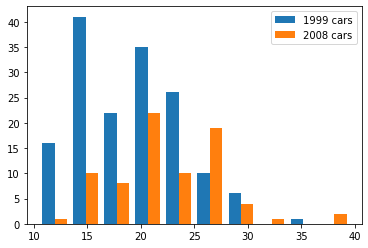

In [13]:
plt.hist([fe_auto, fe_manual], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

Since p value is <0.05, we reject the null hypothesis meaning  fuel economy for manual is better than automatic cars 

In [14]:
df = pd.read_csv('exam_scores.csv')
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


Compare exam scores for folks with high coffee consumption vs low coffee consumption

$H_0$ = Exam scores are same for high and low coffee drinkers.\
$H_0$ = Exam scores are different for high and low cofee drinkers

In [15]:
df['group'] = pd.cut(x=df.coffee_consumed, bins=[0,5,10], labels = ['low', 'high'], include_lowest = True)

In [16]:
df

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept,group
0,100.591011,9.126291,flashcards,left,0,11,low
1,95.637086,9.677438,flashcards,left,1,10,low
2,53.200296,4.550207,NaN,right,5,6,low
3,63.934268,6.487848,flashcards,right,4,7,low
4,51.186370,6.720959,flashcards,right,5,6,low
5,99.628593,5.887577,NaN,left,1,10,low
6,10.427946,1.275759,NaN,left,9,2,high
7,65.711877,4.660530,NaN,right,4,7,low
8,66.423415,10.040814,flashcards,right,4,7,low
9,0.000000,0.194810,NaN,left,10,1,high


In [17]:
high_c_score = df[df.group == 'high'].exam_score

In [18]:
low_c_score = df[df.group == 'low'].exam_score

In [19]:
t_stat, p = stats.ttest_ind(low_c_score, high_c_score)
print(f't = {t_stat:.3}')
print(f'p = {p:.3}')

t = 9.06
p = 4.86e-11


Since p-value is < 0.05, the null hypothesis is rejected meaning there is statistically significant different in scores of high vs low coffee drinkers

# Correlation Exercise

Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [20]:
from env import host, user, password

In [21]:
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [22]:
customers = pd.read_sql("SELECT* from customers", get_db_url('telco_churn'))

In [130]:
internet_service_types = pd.read_sql("SELECT* from internet_service_types", get_db_url('telco_churn'))

In [131]:
internet_service_types

,internet_service_type_id,internet_service_type
0,1,DSL
1,2,Fiber optic
2,3,None


In [23]:
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [24]:
customers['total_charges'] = customers['total_charges'].str.strip()

In [35]:
customers = customers.replace(r'^\s*$', np.nan, regex=True)

In [36]:
customers = customers.fillna(0)

In [40]:
customers['total_charges'] = customers['total_charges'].astype(float)

In [41]:
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes


In [42]:
customers.sort_values(by='total_charges')

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
2250,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,25.35,0.00,No
2855,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,1,No,...,Yes,Yes,Yes,No,3,No,2,73.35,0.00,No
3052,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,25.75,0.00,No
945,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,1,Yes,...,Yes,Yes,Yes,No,3,No,4,56.05,0.00,No
1906,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,1,Yes,...,No,Yes,No,No,3,Yes,3,61.90,0.00,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,2,Yes,...,Yes,Yes,Yes,Yes,3,Yes,1,116.25,8564.75,No
6892,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,2,Yes,...,Yes,Yes,Yes,Yes,3,Yes,4,116.95,8594.40,No
6855,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,2,Yes,...,Yes,Yes,Yes,Yes,3,No,4,117.50,8670.10,No
5360,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,2,Yes,...,Yes,Yes,Yes,Yes,3,Yes,3,118.75,8672.45,No


Does tenure correlate with monthly charges?

In [43]:
x = customers.tenure
y = customers.monthly_charges
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, 0.248
p=, 4.094e-99


r= 0.24789985628615002


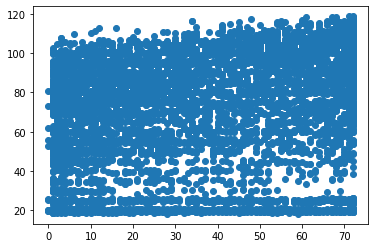

In [44]:
plt.scatter(x, y)
print('r=', r)

Tenure vs Total charges?

In [45]:
x = customers.tenure
y = customers.total_charges


In [46]:
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, 0.826
p=, 0.0


What happens if you control for phone and internet service?

does tenure correlate with charges is the overall question, but we can answer several subquestions to control for other variables, e.g.
how does tenure correlate with charges for folks with internet but no phone
how does tenure correlate with charges for folks with internet and phone service

In [147]:
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes


In [153]:
x = customers[(customers.internet_service_type_id == 1) & (customers.phone_service == 'Yes')].tenure
y = customers[(customers.internet_service_type_id == 1) & (customers.phone_service == 'Yes')].total_charges

In [155]:
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, 0.971
p=, 0.0


In [156]:
x = customers[(customers.internet_service_type_id == 2) & (customers.phone_service == 'Yes')].tenure
y = customers[(customers.internet_service_type_id == 2) & (customers.phone_service == 'Yes')].total_charges

In [157]:
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, 0.985
p=, 0.0


In [158]:
x = customers[(customers.internet_service_type_id == 3) & (customers.phone_service == 'Yes')].tenure
y = customers[(customers.internet_service_type_id == 3) & (customers.phone_service == 'Yes')].total_charges

In [159]:
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, 0.982
p=, 0.0


In [160]:
x = customers[(customers.internet_service_type_id == 1) & (customers.phone_service == 'No')].tenure
y = customers[(customers.internet_service_type_id == 1) & (customers.phone_service == 'No')].total_charges

In [161]:
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, 0.954
p=, 0.0


In [164]:
x = customers[(customers.internet_service_type_id == 3) & (customers.phone_service == 'No')].tenure
y = customers[(customers.internet_service_type_id == 3) & (customers.phone_service == 'No')].total_charges

In [166]:
x

Series([], Name: tenure, dtype: int64)

Use the employees database.\
Is there a relationship between how long an employee has been with the company and their salary?


In [73]:
salary = pd.read_sql("SELECT* from salaries", get_db_url('employees'))

In [74]:
salary.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [75]:
employees = pd.read_sql("SELECT* from employees", get_db_url('employees'))

In [76]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [77]:
curr_salary = salary[salary.to_date.astype('str') == '9999-01-01']

In [78]:
curr_salary

,emp_no,salary,from_date,to_date
16,10001,88958,2002-06-22,9999-01-01
22,10002,72527,2001-08-02,9999-01-01
29,10003,43311,2001-12-01,9999-01-01
45,10004,74057,2001-11-27,9999-01-01
58,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
2844010,499995,52868,2002-06-01,9999-01-01
2844017,499996,69501,2002-05-12,9999-01-01
2844032,499997,83441,2001-08-26,9999-01-01
2844041,499998,55003,2001-12-25,9999-01-01


In [79]:
merged = pd.merge(curr_salary, employees, left_on='emp_no', right_on='emp_no', how='left')

In [80]:
merged.head()

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,10001,88958,2002-06-22,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,72527,2001-08-02,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,43311,2001-12-01,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,74057,2001-11-27,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,94692,2001-09-09,9999-01-01,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [81]:
merged['today'] =  datetime.datetime(2000, 1, 1, 18, 00)

In [82]:
merged.head()

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date,today
0,10001,88958,2002-06-22,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26,2000-01-01 18:00:00
1,10002,72527,2001-08-02,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21,2000-01-01 18:00:00
2,10003,43311,2001-12-01,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28,2000-01-01 18:00:00
3,10004,74057,2001-11-27,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,2000-01-01 18:00:00
4,10005,94692,2001-09-09,9999-01-01,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,2000-01-01 18:00:00


In [120]:
float(str(merged.hire_date[4].year)[0:4])

1989.0

In [121]:
float(str(merged.today[4])[0:4])

2000.0

In [128]:
merged

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date,today,tenure
0,10001,88958,2002-06-22,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26,2000-01-01 18:00:00,14
1,10002,72527,2001-08-02,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21,2000-01-01 18:00:00,14
2,10003,43311,2001-12-01,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28,2000-01-01 18:00:00,14
3,10004,74057,2001-11-27,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,2000-01-01 18:00:00,14
4,10005,94692,2001-09-09,9999-01-01,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,2000-01-01 18:00:00,14
...,...,...,...,...,...,...,...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01,1958-09-24,Dekang,Lichtner,F,1993-01-12,2000-01-01 18:00:00,14
240120,499996,69501,2002-05-12,9999-01-01,1953-03-07,Zito,Baaz,M,1990-09-27,2000-01-01 18:00:00,14
240121,499997,83441,2001-08-26,9999-01-01,1961-08-03,Berhard,Lenart,M,1986-04-21,2000-01-01 18:00:00,14
240122,499998,55003,2001-12-25,9999-01-01,1956-09-05,Patricia,Breugel,M,1993-10-13,2000-01-01 18:00:00,14


In [129]:
merged['tenure1'] = merged.apply(lambda x: (float(str(merged.today[x])[0:4]) - float(str(merged.hire_date[x].year)[0:4])), axis =1)

ValueError: ("could not convert string to float: '0\\n10'", 'occurred at index 0')

In [108]:
merged['tenure'] = merged.apply(lambda x: int(str(merged.today[x])[0:4])- int(str(merged.hire_date[x].year)[0:4]), axis =1)

ValueError: ("invalid literal for int() with base 10: '0\\n10'", 'occurred at index 0')

In [107]:
merged.head(100)

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date,today,tenure
0,10001,88958,2002-06-22,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26,2000-01-01 18:00:00,14
1,10002,72527,2001-08-02,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21,2000-01-01 18:00:00,14
2,10003,43311,2001-12-01,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28,2000-01-01 18:00:00,14
3,10004,74057,2001-11-27,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,2000-01-01 18:00:00,14
4,10005,94692,2001-09-09,9999-01-01,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,2000-01-01 18:00:00,14
5,10006,59755,2001-08-02,9999-01-01,1953-04-20,Anneke,Preusig,F,1989-06-02,2000-01-01 18:00:00,14
6,10007,88070,2002-02-07,9999-01-01,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,2000-01-01 18:00:00,14
7,10009,94409,2002-02-14,9999-01-01,1952-04-19,Sumant,Peac,F,1985-02-18,2000-01-01 18:00:00,14
8,10010,80324,2001-11-23,9999-01-01,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,2000-01-01 18:00:00,14
9,10012,54423,2001-12-16,9999-01-01,1960-10-04,Patricio,Bridgland,M,1992-12-18,2000-01-01 18:00:00,14


In [102]:
x = merged.tenure
y = merged.salary

In [104]:
x

0         14
1         14
2         14
3         14
4         14
          ..
240119    14
240120    14
240121    14
240122    14
240123    14
Name: tenure, Length: 240124, dtype: int64

In [103]:
r, p = stats.pearsonr(x, y)
print(f'r=, {r:0.3}')
print(f'p=, {p:0.4}')

r=, nan
p=, nan
